In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Gerando dados fictícios de clientes
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'ID': range(1, n + 1),
    'Renda_Mensal': np.round(np.random.uniform(1000, 15000, n), 2),
    'Investimentos': np.round(np.random.uniform(0, 300000, n), 2),
    'Regiao': np.random.choice(['PR', 'SP', 'RJ'], n, p=[0.35, 0.4, 0.25])
})

df.head()

,ID,Renda_Mensal,Investimentos,Regiao
0,1,6243.56,55539.88,PR
1,2,14310.00,162570.28,PR
2,3,11247.92,261883.75,RJ
3,4,9381.22,219667.47,PR
4,5,3184.26,241968.34,PR


In [3]:
def classificar_pf(renda, investimento):
    if renda <= 2000:
        return 'PF I'
    elif 2000 < renda <= 4000:
        return 'PF II'
    elif (4000 < renda <= 10000) or (investimento >= 100000):
        return 'PF III'
    elif renda > 10000 or investimento >= 250000:
        return 'PF IV'
    else:
        return 'Indefinido'

df['Segmento_PF'] = df.apply(lambda row: classificar_pf(row['Renda_Mensal'], row['Investimentos']), axis=1)
df['Segmento_PF'].value_counts()

Segmento_PF
PF III    667
PF II     163
PF IV      97
PF I       73
Name: count, dtype: int64

In [4]:
def canal_atendimento(segmento):
    if segmento in ['PF I', 'PF II']:
        return 'Digital'
    elif segmento in ['PF III', 'PF IV']:
        return 'Agência'
    else:
        return 'Indefinido'

df['Canal_Atendimento'] = df['Segmento_PF'].apply(canal_atendimento)
df[['Renda_Mensal', 'Investimentos', 'Segmento_PF', 'Canal_Atendimento']].head()

,Renda_Mensal,Investimentos,Segmento_PF,Canal_Atendimento
0,6243.56,55539.88,PF III,Agência
1,14310.00,162570.28,PF III,Agência
2,11247.92,261883.75,PF III,Agência
3,9381.22,219667.47,PF III,Agência
4,3184.26,241968.34,PF II,Digital


C:\Users\João P. Reis\AppData\Local\Temp\ipykernel_17196\3209932764.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segmento_PF', data=df, palette='Set2')


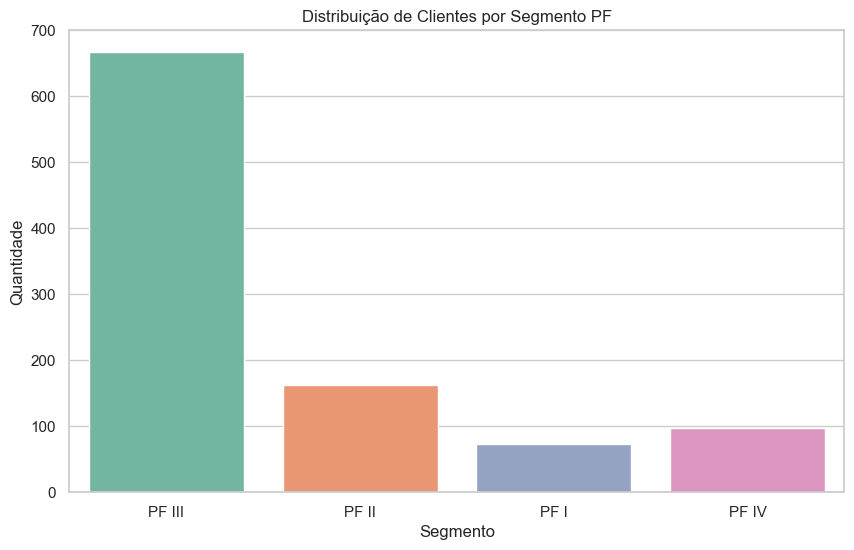

In [5]:
sns.countplot(x='Segmento_PF', data=df, palette='Set2')
plt.title("Distribuição de Clientes por Segmento PF")
plt.xlabel("Segmento")
plt.ylabel("Quantidade")
plt.show()

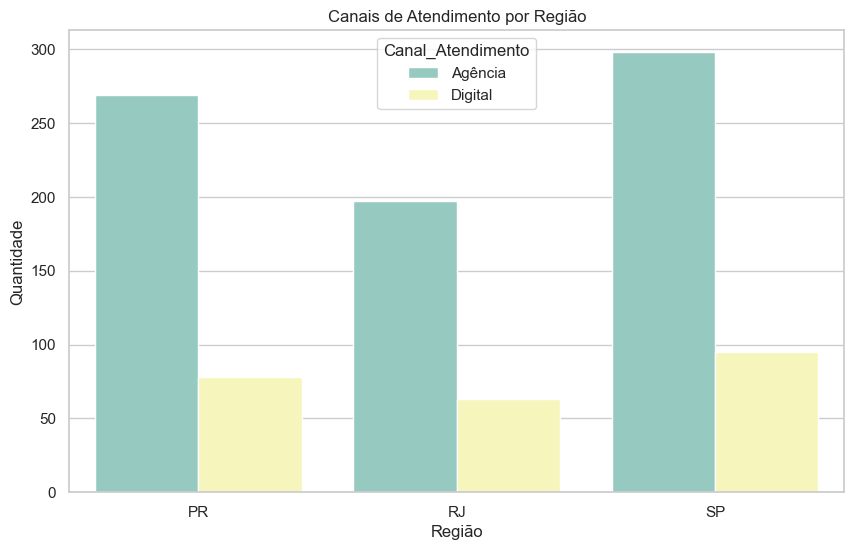

In [6]:
sns.countplot(x='Regiao', hue='Canal_Atendimento', data=df, palette='Set3')
plt.title("Canais de Atendimento por Região")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.show()

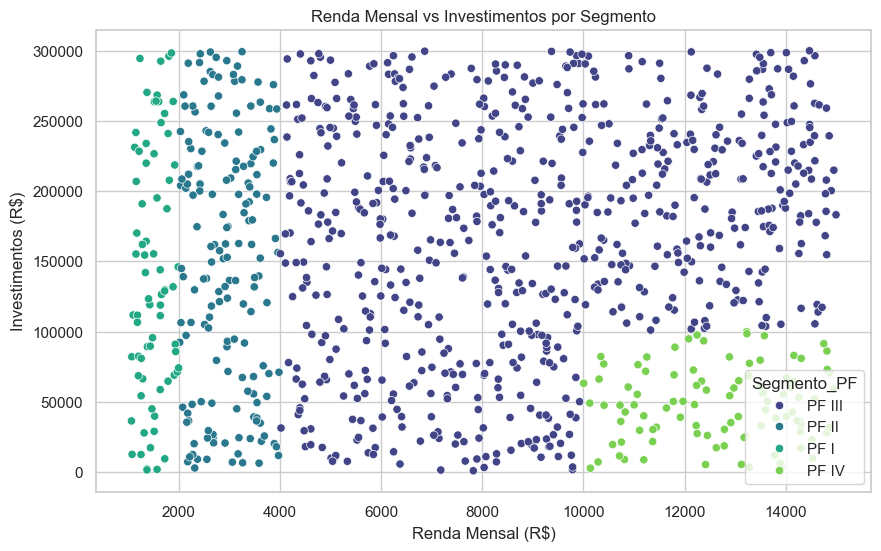

In [7]:
sns.scatterplot(x='Renda_Mensal', y='Investimentos', hue='Segmento_PF', data=df, palette='viridis')
plt.title("Renda Mensal vs Investimentos por Segmento")
plt.xlabel("Renda Mensal (R$)")
plt.ylabel("Investimentos (R$)")
plt.show()

In [8]:
# Agrupar os dados por 'Segmento_PF' e calcular estatísticas descritivas para 'Renda_Mensal' e 'Investimentos'
stats_segmentos = df.groupby('Segmento_PF')[['Renda_Mensal', 'Investimentos']].agg(['mean', 'median', 'std', 'min', 'max'])
stats_segmentos

Renda_Mensal                                             \
                     mean    median          std       min       max   
Segmento_PF                                                            
PF I          1495.415068   1481.44   265.272823   1064.85   1996.64   
PF II         2949.345337   2950.99   559.052047   2018.68   3981.50   
PF III        9064.109880   8834.96  3092.750817   4009.17  14996.05   
PF IV        12658.988969  12889.13  1428.649026  10006.04  14956.24   

             Investimentos                                               
                      mean     median           std      min        max  
Segmento_PF                                                              
PF I         140813.336164  128897.04  87372.279008  1568.88  298241.81  
PF II        151043.215890  157549.02  90829.699846  2931.25  299137.35  
PF III       168706.872444  180178.30  82047.370484   965.48  299824.12  
PF IV         48229.792680   47863.40  26336.431329  2799.49   99900.57

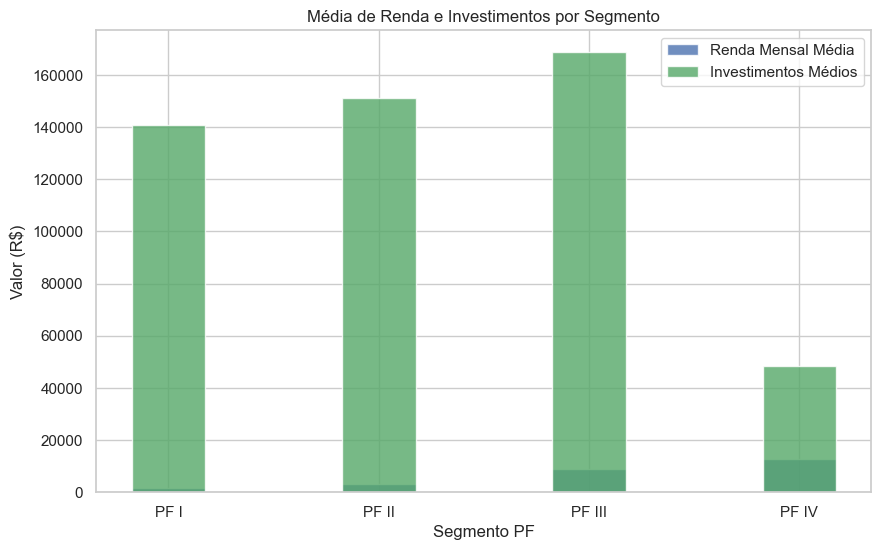

In [9]:
import matplotlib.pyplot as plt

# Calcular as médias para cada segmento
media_renda = df.groupby('Segmento_PF')['Renda_Mensal'].mean()
media_investimentos = df.groupby('Segmento_PF')['Investimentos'].mean()

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(10,6))
index = media_renda.index
bar_width = 0.35
opacity = 0.8

# Plotar as barras
bars1 = ax.bar(index, media_renda, bar_width, alpha=opacity, color='b', label='Renda Mensal Média')
bars2 = ax.bar(index, media_investimentos, bar_width, alpha=opacity, color='g', label='Investimentos Médios')

ax.set_xlabel('Segmento PF')
ax.set_ylabel('Valor (R$)')
ax.set_title('Média de Renda e Investimentos por Segmento')
ax.legend()

plt.show()

C:\Users\João P. Reis\AppData\Local\Temp\ipykernel_17196\2006490226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmento_PF', y='Renda_Mensal', data=df, palette='Set2')


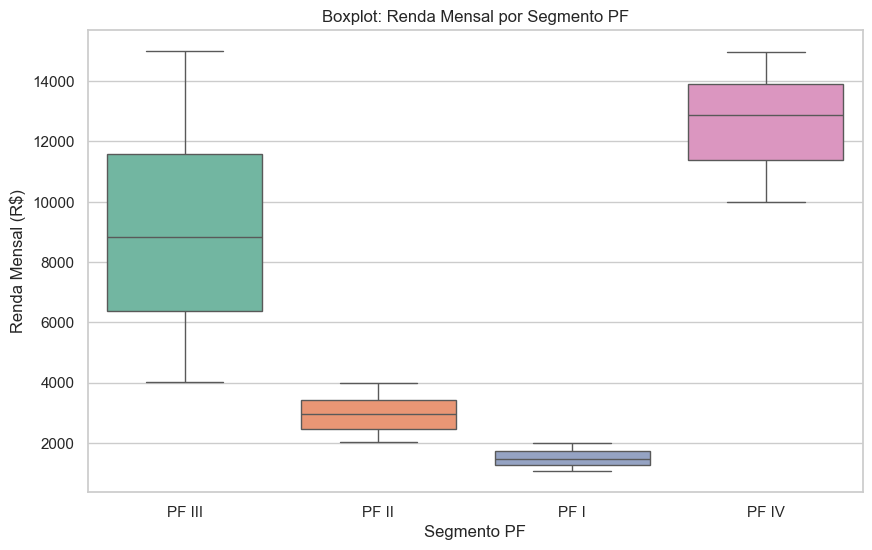

C:\Users\João P. Reis\AppData\Local\Temp\ipykernel_17196\2006490226.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmento_PF', y='Investimentos', data=df, palette='Set3')


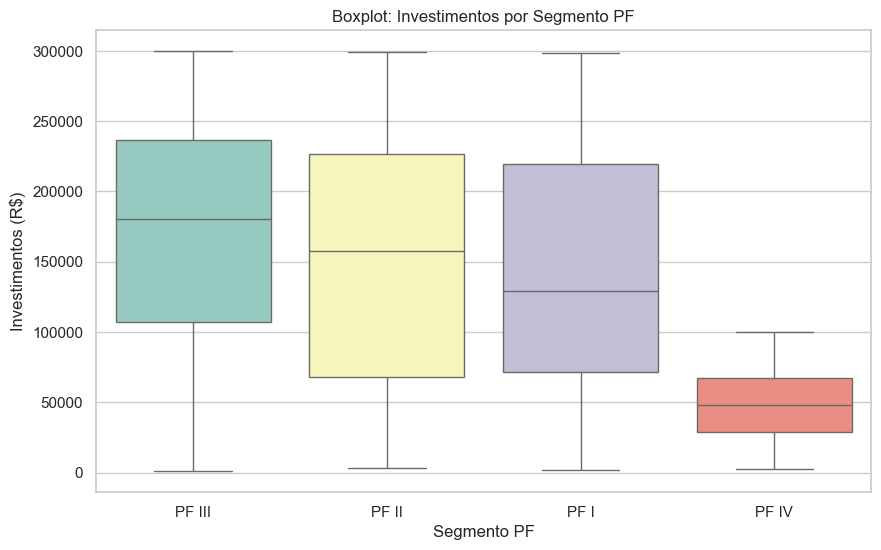

In [10]:
import seaborn as sns

# Boxplot para Renda Mensal por Segmento
plt.figure(figsize=(10,6))
sns.boxplot(x='Segmento_PF', y='Renda_Mensal', data=df, palette='Set2')
plt.title('Boxplot: Renda Mensal por Segmento PF')
plt.xlabel('Segmento PF')
plt.ylabel('Renda Mensal (R$)')
plt.show()

# Boxplot para Investimentos por Segmento
plt.figure(figsize=(10,6))
sns.boxplot(x='Segmento_PF', y='Investimentos', data=df, palette='Set3')
plt.title('Boxplot: Investimentos por Segmento PF')
plt.xlabel('Segmento PF')
plt.ylabel('Investimentos (R$)')
plt.show()

Mapeamento das classes: {'PF I': np.int64(0), 'PF II': np.int64(1), 'PF III': np.int64(2), 'PF IV': np.int64(3)}

Relatório de Classificação:
              precision    recall  f1-score   support

        PF I       1.00      1.00      1.00        19
       PF II       1.00      1.00      1.00        30
      PF III       0.99      1.00      1.00       128
       PF IV       1.00      0.96      0.98        23

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Matriz de Confusão:
[[ 19   0   0   0]
 [  0  30   0   0]
 [  0   0 128   0]
 [  0   0   1  22]]


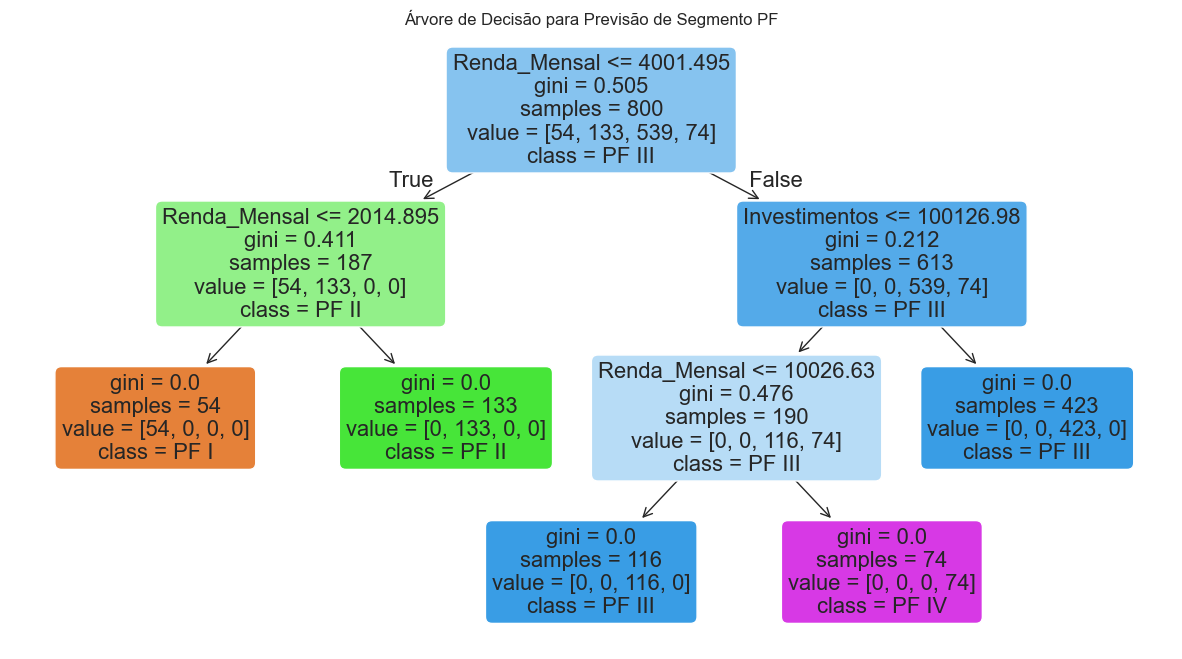

In [11]:
# Importação das bibliotecas necessárias para ML
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Selecionar as features (variáveis preditoras) e o target
X = df[['Renda_Mensal', 'Investimentos']]
y = df['Segmento_PF']

# 2. Codificar os rótulos (Segmento_PF) em valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Exibir mapeamento das classes
print("Mapeamento das classes:", dict(zip(le.classes_, le.transform(le.classes_))))

# 3. Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Treinar o modelo de Árvore de Decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 5. Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# 6. Avaliar o modelo: Relatório de classificação e Matriz de Confusão
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# 7. Visualizar a Árvore de Decisão
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Árvore de Decisão para Previsão de Segmento PF")
plt.show()

In [12]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print("Regras da Árvore de Decisão:")
print(tree_rules)

Regras da Árvore de Decisão:
|--- Renda_Mensal <= 4001.49
|   |--- Renda_Mensal <= 2014.90
|   |   |--- class: 0
|   |--- Renda_Mensal >  2014.90
|   |   |--- class: 1
|--- Renda_Mensal >  4001.49
|   |--- Investimentos <= 100126.98
|   |   |--- Renda_Mensal <= 10026.63
|   |   |   |--- class: 2
|   |   |--- Renda_Mensal >  10026.63
|   |   |   |--- class: 3
|   |--- Investimentos >  100126.98
|   |   |--- class: 2



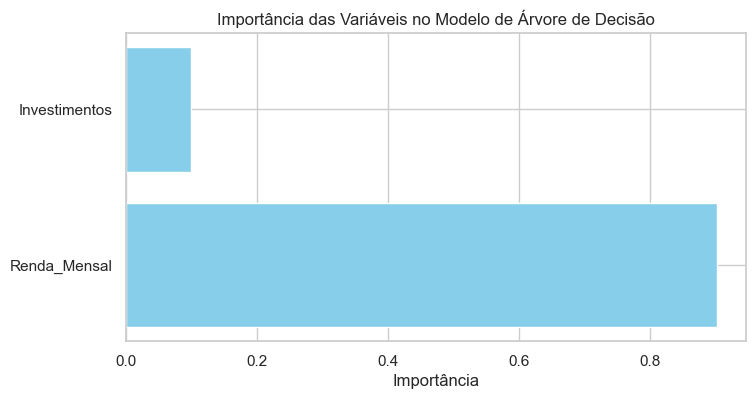

In [13]:
import matplotlib.pyplot as plt

# Calcular a importância das features
importancias = clf.feature_importances_
features = X.columns

# Criar gráfico de barras horizontal
plt.figure(figsize=(8, 4))
plt.barh(features, importancias, color='skyblue')
plt.xlabel("Importância")
plt.title("Importância das Variáveis no Modelo de Árvore de Decisão")
plt.show()